## Entrada/salida de arrays NumPy

NumPy tiene una categoría de funciones para grabar y recuperar arrays de disco:
    https://docs.scipy.org/doc/numpy/reference/routines.io.html
    


In [1]:
import numpy as np
N = 10
a = np.random.uniform(size=N)
b = np.random.normal(size=N)
b

array([-0.42753583,  0.45035096, -0.07338376,  0.00647217, -0.01135531,
        0.98093445,  1.09468168,  1.63411018,  0.209632  , -2.52015796])

1. Guardar los arrays anteriores en formato específico de NumPy comprimido y formato de texto (sin comprimir). 
2. Comparar las diferencias de espacio en disco desde el mismo Notebook, y ver sus contenidos con el comando `head` del sistema operativo.
3. Cargarlos de nuevo en memoria con nombres de variable diferentes.
4. (opcional) Guardar los dos arrays en un solo fichero de texto y recuperarlos de nuevo. Pista: utilizar tuplas.

In [2]:
np.savez_compressed("arrays", a, b)

In [3]:
np.savetxt("arrayA.txt", a)
np.savetxt("arrayB.txt", b)

In [4]:
%ls -la

 El volumen de la unidad C es Windows8_OS
 El n£mero de serie del volumen es: A699-69CC

 Directorio de C:\Users\CarlosEduardo\CiffBigData\DataSciencePython\EjercicioPropuesto_1



No se encuentra el archivo


In [5]:
!head arrayA.txt 

"head" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [6]:
# Lo siguiente muestra solo codigos binarios, no es legible
# !head arrays.npz

In [7]:
x1 = np.loadtxt("arrayA.txt")
x1

array([ 0.9536406 ,  0.35453052,  0.21129288,  0.76495435,  0.50845737,
        0.52982943,  0.68964557,  0.36270144,  0.53420692,  0.40915048])

In [8]:
arrays = np.load("arrays.npz")
arrays.files
segundo_array = arrays["arr_1"]
segundo_array

array([-0.42753583,  0.45035096, -0.07338376,  0.00647217, -0.01135531,
        0.98093445,  1.09468168,  1.63411018,  0.209632  , -2.52015796])

In [9]:
np.savetxt("dos_arrays.txt", (a, b))

In [10]:
a, b = np.loadtxt("dos_arrays.txt")
b

array([-0.42753583,  0.45035096, -0.07338376,  0.00647217, -0.01135531,
        0.98093445,  1.09468168,  1.63411018,  0.209632  , -2.52015796])

In [11]:
!head dos_arrays.txt

"head" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## Generación de datos - distribuciones de SciPy

SciPy tiene un buen número de distribuciones de probabilidad conocidas implementadas, continuas y discretas:
https://docs.scipy.org/doc/scipy/reference/stats.html 

Por ejemplo, podemos trabajar con distribuciones normales de la siguiente forma.


(array(5.0), array(1.0))


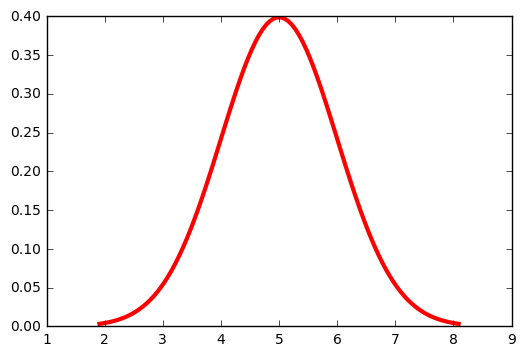

In [12]:
from scipy.stats import norm

# Creamos una distribució normal con media 5.
mi_normal = norm(5)

# Obtenemos los percentiles de los extremos de la distribución:
x = np.linspace(mi_normal.ppf(0.001), mi_normal.ppf(0.999), 100)

# Obtenemos los estadísticos comunes:
m, v = mi_normal.stats(moments='mv')
print(m, v)

# Dibujamos la función
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, mi_normal.pdf(x), 'r-', lw=3)


Podemos generar a su vez datos aleatorios para simular una muestra de la siguiente manera. 

(array([ 0.00383912,  0.        ,  0.        ,  0.00383912,  0.01535649,
         0.04606946,  0.03455209,  0.06142594,  0.14204749,  0.17276047,
         0.3032906 ,  0.3570383 ,  0.33784269,  0.34552093,  0.44917721,
         0.34936005,  0.39542951,  0.29945147,  0.19195607,  0.10365628,
         0.08446067,  0.06910419,  0.03071297,  0.03071297,  0.01151736]),
 array([ 1.32164998,  1.58212624,  1.8426025 ,  2.10307876,  2.36355502,
         2.62403128,  2.88450754,  3.1449838 ,  3.40546006,  3.66593632,
         3.92641258,  4.18688884,  4.4473651 ,  4.70784136,  4.96831762,
         5.22879388,  5.48927014,  5.7497464 ,  6.01022266,  6.27069892,
         6.53117518,  6.79165144,  7.0521277 ,  7.31260396,  7.57308022,
         7.83355648]),
 <a list of 25 Patch objects>)

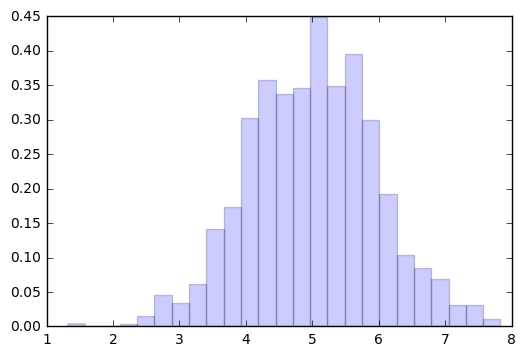

In [13]:
r = mi_normal.rvs(size=1000)
plt.hist(r, normed=True, alpha=0.2, bins="auto")

Queremos ahora estudiar la distribución de Pareto. Podemos ver su forma en Wikipedia:
https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Pareto 

Se pide lo siguiente:
- Representar las funciones de densidad y de probabilidad similares a las de Wikipedia.
- Hallar el percentil del 80% con k=1. Razonar sobre el Principio de Pareto, se puede consultar aquí: https://en.wikipedia.org/wiki/Pareto_principle

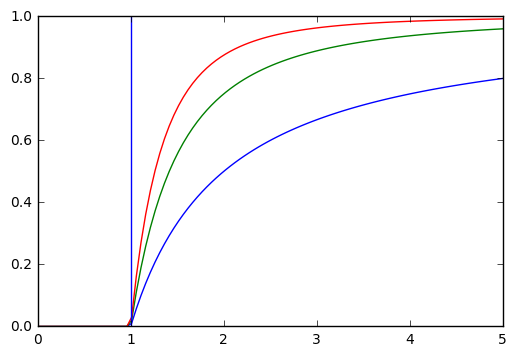

In [31]:
from scipy.stats import pareto
x = np.linspace(0, 5, 100)

for k in [1, 2, 3]:
    plt.plot(x, pareto(k).cdf(x))
plt.axvline(1)

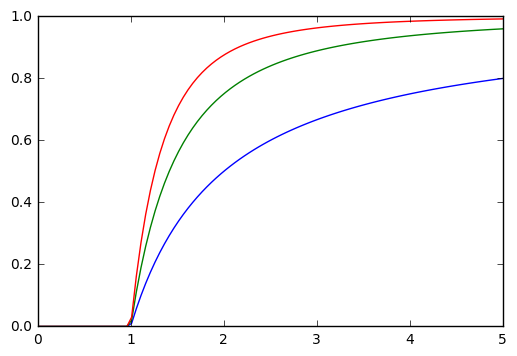

In [15]:
for k in [1, 2, 3]:
    plt.plot(x, pareto(k).cdf(x))

4.00461111622


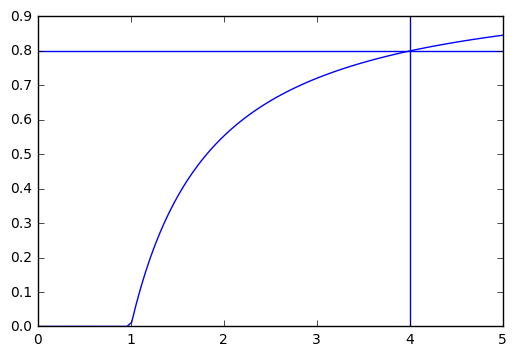

In [17]:
print(pareto(1.16).ppf(0.8))
plt.plot(x, pareto(1.16).cdf(x))
plt.axvline(4)
plt.axhline(0.8)

De la Wikipedia: "This is a special case of the wider phenomenon of Pareto distributions. If the Pareto index k, which is one of the parameters characterizing a Pareto distribution, is chosen as $k = log_{4}5 ≈ 1.16$, then one has 80% of effects coming from 20% of causes."

Por ejemplo, si la variable es "cantidad de páginas editadas (en decenas) por un usuario en un Wiki" (que se sabe típicamente sigue distribuciones parecidas), tendríamos supuestamente de manera aproximada que 80 de cada 100 usuarios crea menos de 4 páginas. 

## Generación de datos - otras distribuciones

Si no encontrásemos la distribución en las bibliotecas de ScyPy pero la conocemos ("sabemos la fórmula"), siempre podemos generar los datos aleatorios generando un array con los datos en el rango en que está definida, y después tomando aleaoriamente un número de elementos de allí ("con reemplazo").


Vamos a pensar si tenemos esta función:
$f(t)$ definida por:
$$f(t)=\begin{cases}
  0, & t<0, \\
  \frac{2t}{(1+t^2)^2}, & t \ge 0
\end{cases}$$

Se pide:
- Dibujar la función en el rango [0, 10].
- Generar una muestra aleatoria de la misma.
- Dibujar esa muestra y su histograma.

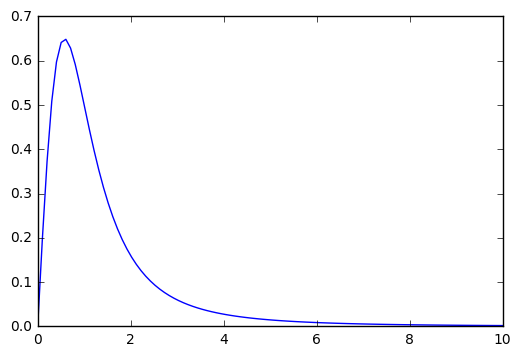

In [24]:
x = np.linspace(0, 10, 100)
f_t = (2*x)/(1+x**2)**2
plt.plot(x, f_t)

(array([ 17.,   6.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   1.]),
 array([ 0.0021475 ,  0.01980597,  0.03746444,  0.0551229 ,  0.07278137,
         0.09043984,  0.1080983 ,  0.12575677,  0.14341524,  0.1610737 ,
         0.17873217,  0.19639064,  0.2140491 ,  0.23170757,  0.24936604,
         0.26702451,  0.28468297,  0.30234144,  0.31999991,  0.33765837,
         0.35531684,  0.37297531]),
 <a list of 21 Patch objects>)

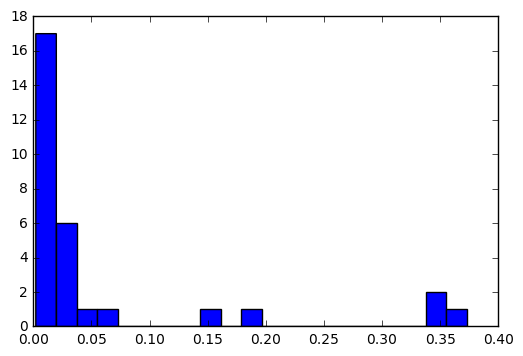

In [25]:
muestra = np.random.choice(f_t, size=30)
plt.hist(muestra, bins="auto")

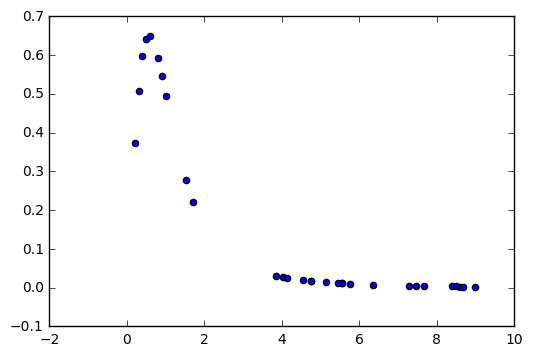

In [28]:
indices = np.random.randint(low=0, high=len(x), size=30)
plt.scatter(x[indices], f_t[indices])

## Generación de datos censurados

En las técnicas de análisis estadístico conocidas como "análisis de supervivencia" se considera el tiempo hasta un evento. Por ejemplo, en enfermos de cáncer, sería el tiempo hasta el fallecimiento o al final del estudio. 

Si alguno de los enfermos en estudio antes de fallecer abandona el estudio (por ejemplo, emigra a otro país) decimos que el dato está "censurado" porque tenemos la fecha en la que se fue, que es lógicamente inferior a la fecha desconocida de su fallecimiento. También son datos "censurados" los tiempos de los pacientes que al terminar el estudio aún siguen vivos.

Generar datos censurados sintéticos requiere por tanto dos pasos:
- Generar aleatorios con la distribución(-es) de los tiempos de fallecimiento.
- Decidir el tiempo en que termina el estudio y ajustar los tiempos a ese máximo. 

Por otro lado, en la mayoría de los estudios se tiene dos grupos que se comparan. Vamos a simular dos grupos de pacientes con diferente distribución e influir datos censurados.

Se pide generar unos datos simulados de dos poblacioens de pacientes:
- Cuyo tiempo de supervivencia sigue una distribución exponencial en ambos casos, pero con parámetros diferentes (por ejemplo, 12 y 2). Pista: Crear dos arrays de aleatorios, o un array con tuplas. 
- En la que se mezclan aleatoriamente un número de unos u otros. Pista: utilizar la distribución `uniform()` e indexar una u otra de las series.
- En la que finalmente, el estudio termina en el tiempo $t=10$.


In [29]:
from numpy.random import uniform, exponential

N = 40 # Sample size

# We will fabricate data pertaining to two different distributions,to simulate two groups:
data = [[exponential(12), exponential(2)] for i in range(N)]

# Then we choose one or the other in the final dataset randomly:
data = [d[uniform()<0.5] for d in data] # Selects the first or second column.

# Finally we transform to NumPy:
true_data = np.array(data)
true_data

array([  1.30020231e+01,   9.82431936e-02,   1.10862911e+00,
         1.48328122e+00,   5.05639492e+00,   2.71604685e+00,
         7.75016164e-01,   1.61777165e-01,   1.86684144e-01,
         1.58241808e+00,   3.86459579e-01,   1.37189203e+01,
         2.46662267e-02,   2.30500972e+00,   1.06560150e+00,
         3.50955607e+00,   9.41825441e+00,   4.01424492e-01,
         8.29653483e+00,   5.20661615e+00,   1.25117070e+00,
         1.48621888e+01,   1.52081576e+00,   2.66325656e+00,
         6.84484522e+00,   3.87152307e-01,   9.81973178e-01,
         1.81957891e-01,   2.82877821e+00,   1.50511409e+01,
         1.17433084e+00,   6.50519458e+00,   5.83972713e+00,
         1.76542531e-01,   9.64761862e-01,   2.52883267e+01,
         2.95793808e-01,   1.11666483e+01,   9.45858060e+00,
         8.21809735e+00])

Finalmente si este estudio termina en $t=10$, podemos terminar la generación de la siguiente manera. 

In [160]:
end_study_time = 10
study_data = np.minimum(true_data, end_study_time)
study_data

array([  4.05657476,   4.28614786,   0.65160809,   8.06204571,
         0.79755396,  10.        ,   0.90375899,   8.31592143,
         1.56004886,  10.        ,   1.83919043,   1.99046259,
         1.37709506,   4.96236193,   0.47009331,   7.28971779,
         0.14876964,   0.29977532,   2.28037756,   2.70963563,
         7.61765936,  10.        ,   0.96501454,  10.        ,
         6.06833948,   2.47348596,   7.12433861,   7.76449451,
         2.06727457,   1.25598658,   0.33654483,   0.1122796 ,
         0.90028773,   3.35920976,  10.        ,   0.41282802,
        10.        ,   1.65290614,   0.99279439,  10.        ])